# Case Study 2: Real Estate Price Prediction (Regression)

**Student Name:** Naman Nagar  
**SRN:** PES2UG23CS361
**Dataset:** house_price_data.csv  
**Objective:** Predict house sale prices using regression algorithms

## Task 1: Data Loading and Exploration

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

In [2]:
# Load the dataset
df = pd.read_csv('house_price_data.csv')

# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (8000, 25)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_id              8000 non-null   object 
 1   neighborhood             8000 non-null   object 
 2   distance_to_city_center  8000 non-null   float64
 3   distance_to_metro        8000 non-null   int64  
 4   distance_to_school       8000 non-null   int64  
 5   crime_rate               8000 non-null   float64
 6   house_age                8000 non-null   int64  
 7   total_area               8000 non-null   int64  
 8   bedrooms                 8000 non-null   int64  
 9   bathrooms                8000 non-null   int64  
 10  floors                   8000 non-null   int64  
 11  garage                   8000 non-null   int64  
 12  garden                   8000 non-null   int64  
 13  basement                 8000 non-nul

In [3]:
# Display first few rows
print("First 5 rows:")
df.head()

First 5 rows:


,property_id,neighborhood,distance_to_city_center,distance_to_metro,distance_to_school,crime_rate,house_age,total_area,bedrooms,bathrooms,...,construction_quality,renovation_status,heating_type,air_conditioning,parking_spaces,energy_efficiency,listing_duration,season_sold,year_sold,sale_price
0,PROP_000001,Forest Glen,6.6,908,296,1.0,22,103,3,3,...,Basic,Full,Gas,0,2,D,1,Winter,2022,342.8
1,PROP_000002,Lakeside,2.6,84,30,1.0,12,114,2,2,...,Standard,Never,Gas,1,0,A,17,Fall,2023,545.0
2,PROP_000003,Downtown,10.2,50,120,1.0,21,83,5,3,...,Premium,Never,Central,1,1,C,4,Summer,2021,710.1
3,PROP_000004,Riverside,5.1,475,48,1.0,0,127,3,1,...,Standard,Full,Central,1,1,D,55,Winter,2023,894.5
4,PROP_000005,Oakwood,0.5,647,111,1.0,21,59,6,2,...,Standard,Never,Central,0,0,C,15,Fall,2023,258.4


In [4]:
# Check for missing values
print("Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found!")

Missing Values:
Series([], dtype: int64)
No missing values found!


In [5]:
# Summary statistics
print("Summary Statistics:")
df.describe()

Summary Statistics:


,distance_to_city_center,distance_to_metro,distance_to_school,crime_rate,house_age,total_area,bedrooms,bathrooms,floors,garage,garden,basement,balcony,air_conditioning,parking_spaces,listing_duration,year_sold,sale_price
count,8000.000000,8000.000000,8000.000000,8000.0,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000
mean,3.785213,337.536250,148.724875,1.0,14.295125,150.608125,3.359500,2.502875,1.808250,0.698000,0.598875,0.389625,0.504375,0.40050,1.400375,29.411625,2021.591625,725.181400
std,3.953137,350.469891,165.435271,0.0,14.677669,83.534599,1.129345,0.802074,0.600231,0.459154,0.490157,0.487696,0.500012,0.49003,0.922730,29.499529,1.065597,350.856932
min,0.500000,50.000000,30.000000,1.0,0.000000,50.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2020.000000,80.000000
25%,1.000000,94.750000,35.000000,1.0,4.000000,86.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,8.000000,2021.000000,416.375000
50%,2.500000,221.000000,90.000000,1.0,10.000000,134.000000,3.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.00000,1.000000,20.000000,2022.000000,684.600000
75%,5.100000,455.000000,194.000000,1.0,20.000000,196.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.000000,42.000000,2022.000000,1108.375000
max,25.000000,3000.000000,1748.000000,1.0,100.000000,500.000000,6.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,200.000000,2023.000000,1200.000000


In [6]:
# Check for outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Check outliers in numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
outlier_summary = {}

for col in numerical_cols:
    outlier_count = detect_outliers(df, col)
    outlier_summary[col] = outlier_count

print("Outlier Summary:")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")

Outlier Summary:
distance_to_city_center: 464 outliers
distance_to_metro: 423 outliers
distance_to_school: 509 outliers
crime_rate: 0 outliers
house_age: 378 outliers
total_area: 193 outliers
bedrooms: 675 outliers
bathrooms: 0 outliers
floors: 0 outliers
garage: 0 outliers
garden: 0 outliers
basement: 0 outliers
balcony: 0 outliers
air_conditioning: 0 outliers
parking_spaces: 0 outliers
listing_duration: 349 outliers
year_sold: 0 outliers
sale_price: 0 outliers


## Task 2: Exploratory Data Analysis (EDA)

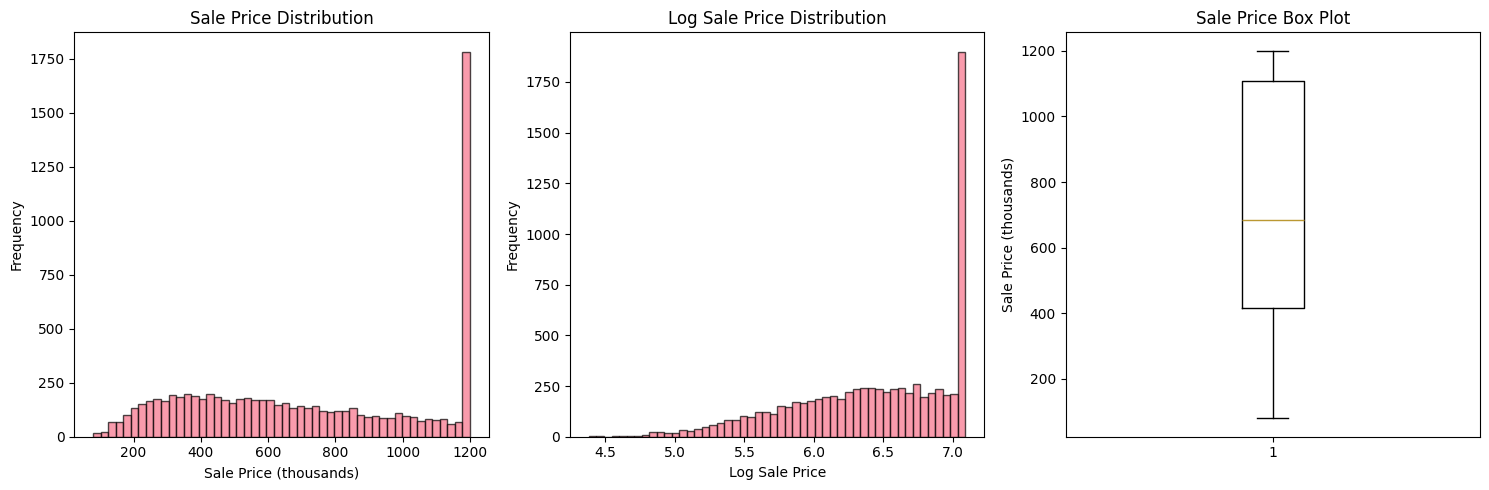

Sale Price Skewness: 0.0730
Data is approximately symmetric


In [7]:
# Analyze price distribution
plt.figure(figsize=(15, 5))

# Price distribution
plt.subplot(1, 3, 1)
plt.hist(df['sale_price'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price (thousands)')
plt.ylabel('Frequency')

# Price distribution (log scale)
plt.subplot(1, 3, 2)
plt.hist(np.log(df['sale_price']), bins=50, alpha=0.7, edgecolor='black')
plt.title('Log Sale Price Distribution')
plt.xlabel('Log Sale Price')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1, 3, 3)
plt.boxplot(df['sale_price'])
plt.title('Sale Price Box Plot')
plt.ylabel('Sale Price (thousands)')

plt.tight_layout()
plt.show()

# Check for skewness
skewness = stats.skew(df['sale_price'])
print(f"Sale Price Skewness: {skewness:.4f}")
if abs(skewness) > 1:
    print("Data is highly skewed - consider log transformation")
elif abs(skewness) > 0.5:
    print("Data is moderately skewed")
else:
    print("Data is approximately symmetric")

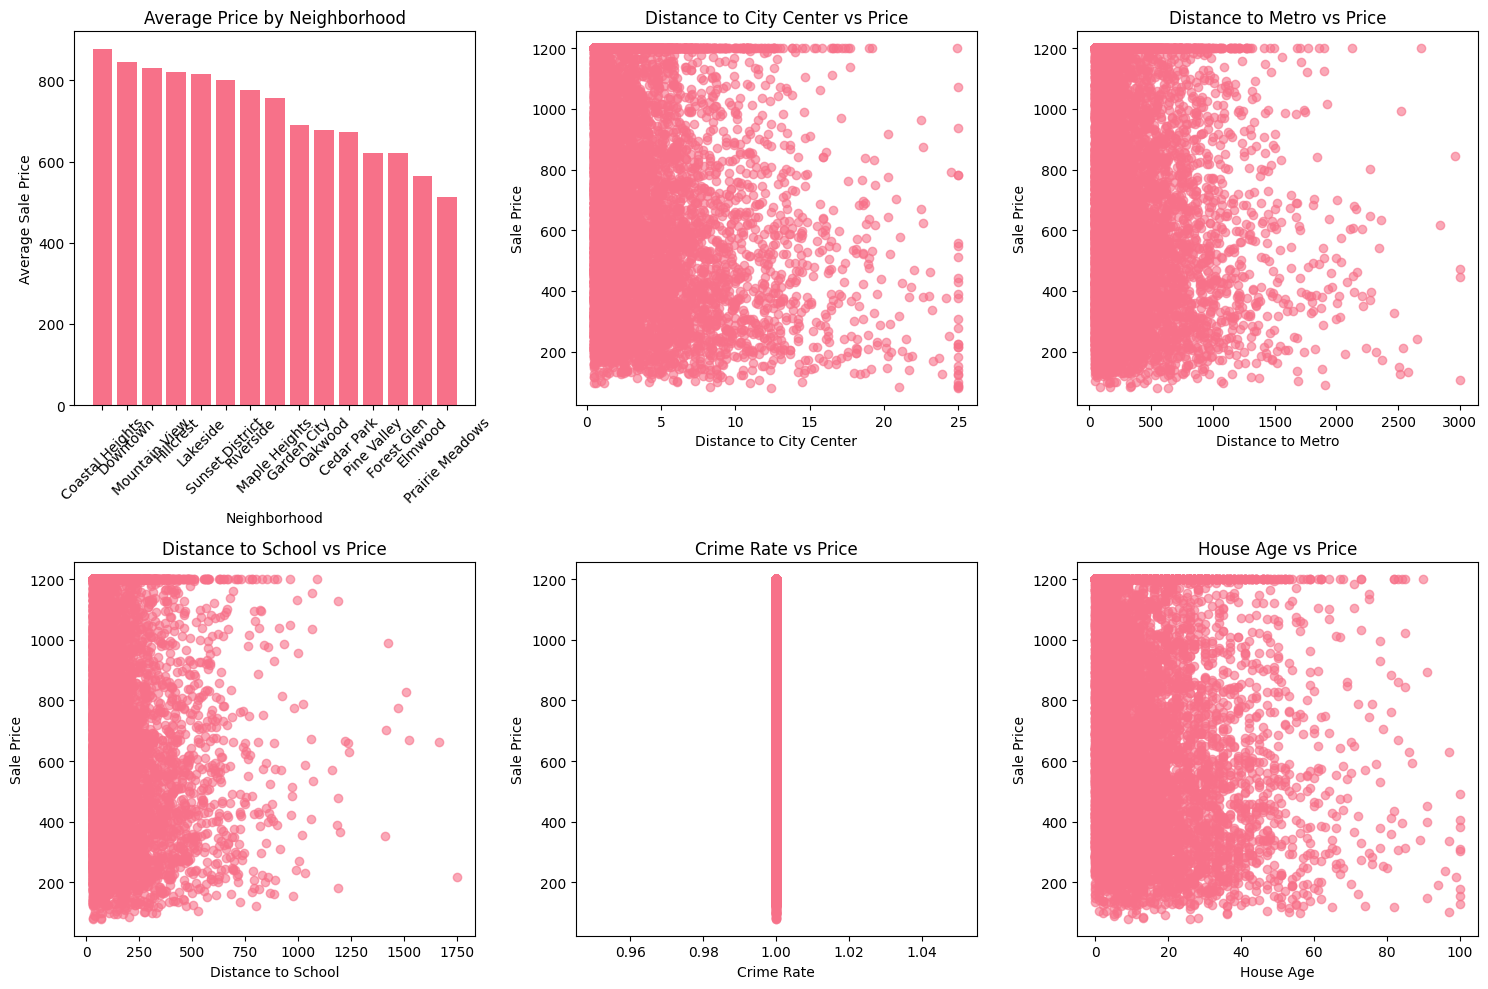

In [8]:
# Location impact analysis
plt.figure(figsize=(15, 10))

# Neighborhood vs Price
plt.subplot(2, 3, 1)
neighborhood_price = df.groupby('neighborhood')['sale_price'].mean().sort_values(ascending=False)
plt.bar(range(len(neighborhood_price)), neighborhood_price.values)
plt.title('Average Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.xticks(range(len(neighborhood_price)), neighborhood_price.index, rotation=45)

# Distance to city center
plt.subplot(2, 3, 2)
plt.scatter(df['distance_to_city_center'], df['sale_price'], alpha=0.6)
plt.title('Distance to City Center vs Price')
plt.xlabel('Distance to City Center')
plt.ylabel('Sale Price')

# Distance to metro
plt.subplot(2, 3, 3)
plt.scatter(df['distance_to_metro'], df['sale_price'], alpha=0.6)
plt.title('Distance to Metro vs Price')
plt.xlabel('Distance to Metro')
plt.ylabel('Sale Price')

# Distance to school
plt.subplot(2, 3, 4)
plt.scatter(df['distance_to_school'], df['sale_price'], alpha=0.6)
plt.title('Distance to School vs Price')
plt.xlabel('Distance to School')
plt.ylabel('Sale Price')

# Crime rate
plt.subplot(2, 3, 5)
plt.scatter(df['crime_rate'], df['sale_price'], alpha=0.6)
plt.title('Crime Rate vs Price')
plt.xlabel('Crime Rate')
plt.ylabel('Sale Price')

# House age
plt.subplot(2, 3, 6)
plt.scatter(df['house_age'], df['sale_price'], alpha=0.6)
plt.title('House Age vs Price')
plt.xlabel('House Age')
plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()

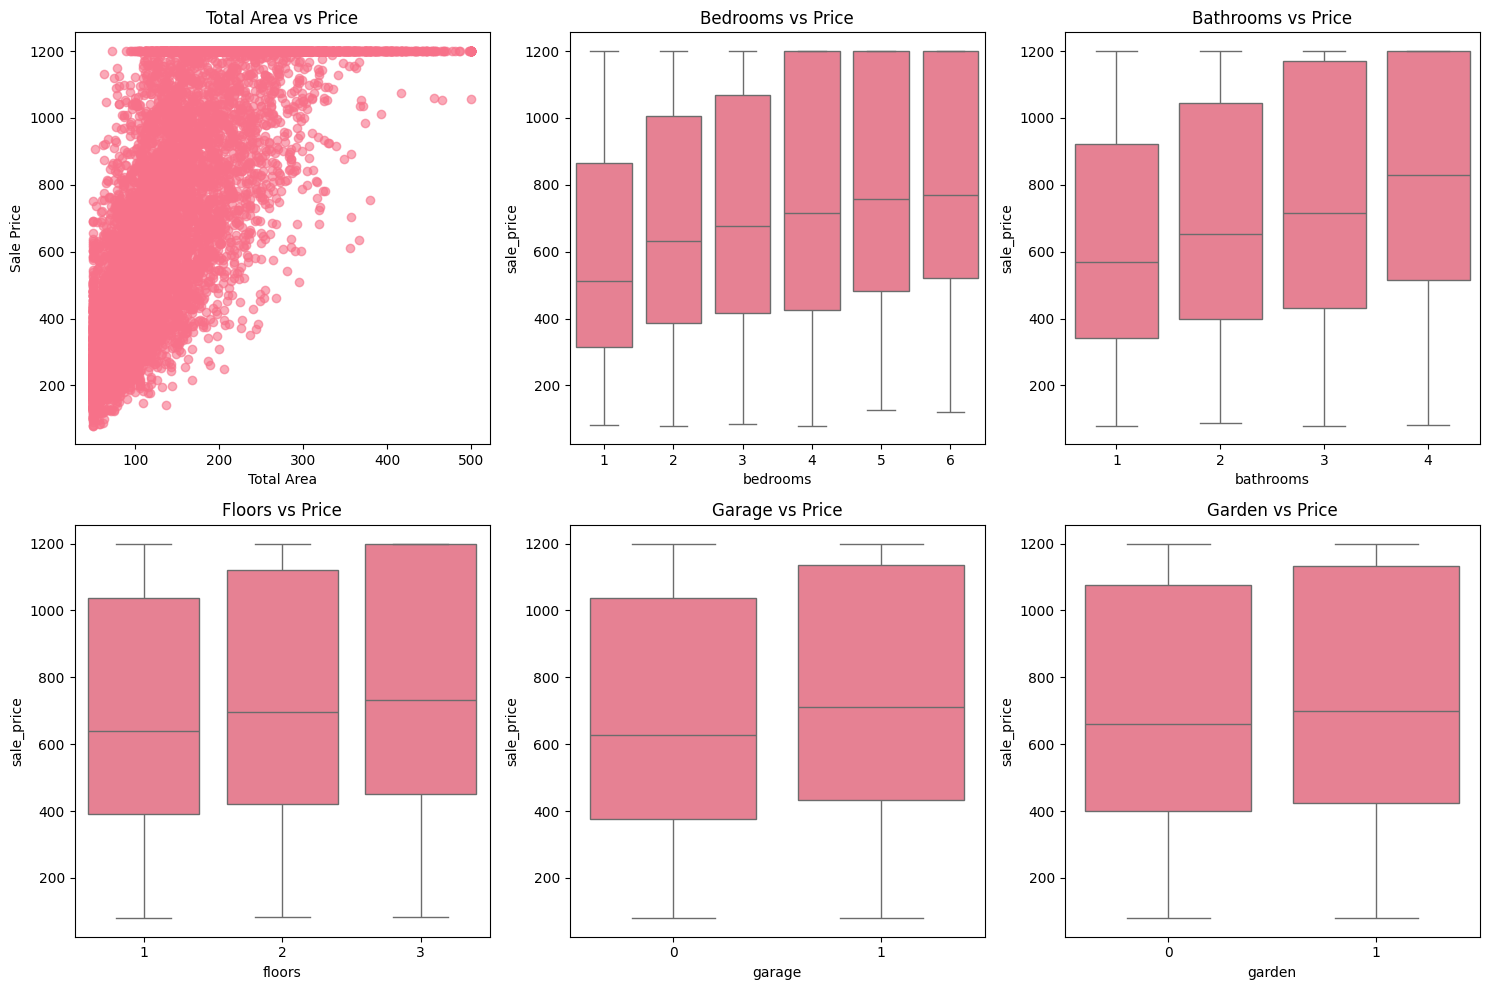

In [9]:
# Property characteristics analysis
plt.figure(figsize=(15, 10))

# Total area vs Price
plt.subplot(2, 3, 1)
plt.scatter(df['total_area'], df['sale_price'], alpha=0.6)
plt.title('Total Area vs Price')
plt.xlabel('Total Area')
plt.ylabel('Sale Price')

# Bedrooms vs Price
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='bedrooms', y='sale_price')
plt.title('Bedrooms vs Price')

# Bathrooms vs Price
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='bathrooms', y='sale_price')
plt.title('Bathrooms vs Price')

# Floors vs Price
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='floors', y='sale_price')
plt.title('Floors vs Price')

# Garage vs Price
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='garage', y='sale_price')
plt.title('Garage vs Price')

# Garden vs Price
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='garden', y='sale_price')
plt.title('Garden vs Price')

plt.tight_layout()
plt.show()

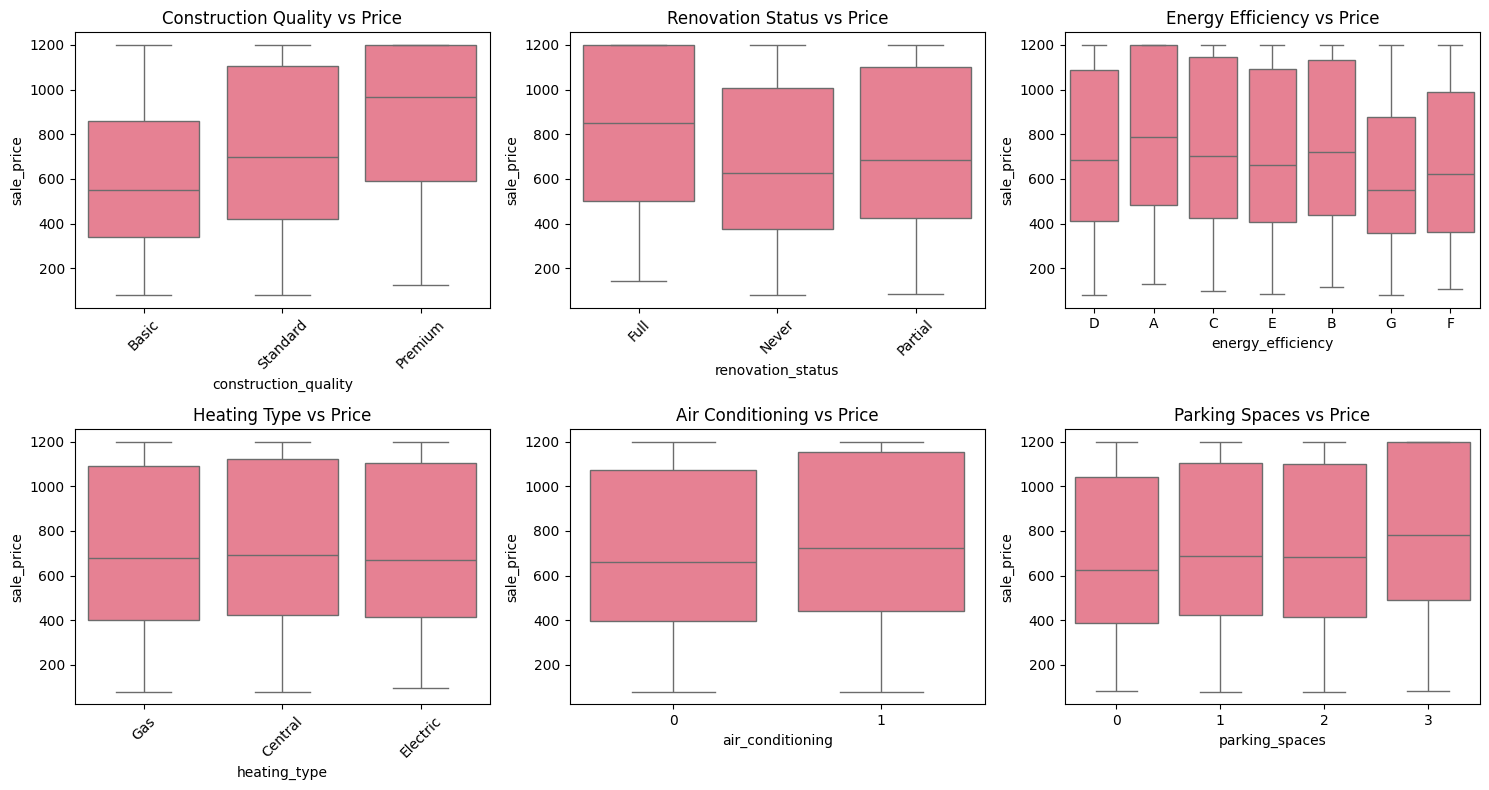

In [10]:
# Quality factors analysis
plt.figure(figsize=(15, 8))

# Construction quality
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='construction_quality', y='sale_price')
plt.title('Construction Quality vs Price')
plt.xticks(rotation=45)

# Renovation status
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='renovation_status', y='sale_price')
plt.title('Renovation Status vs Price')
plt.xticks(rotation=45)

# Energy efficiency
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='energy_efficiency', y='sale_price')
plt.title('Energy Efficiency vs Price')

# Heating type
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='heating_type', y='sale_price')
plt.title('Heating Type vs Price')
plt.xticks(rotation=45)

# Air conditioning
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='air_conditioning', y='sale_price')
plt.title('Air Conditioning vs Price')

# Parking spaces
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='parking_spaces', y='sale_price')
plt.title('Parking Spaces vs Price')

plt.tight_layout()
plt.show()

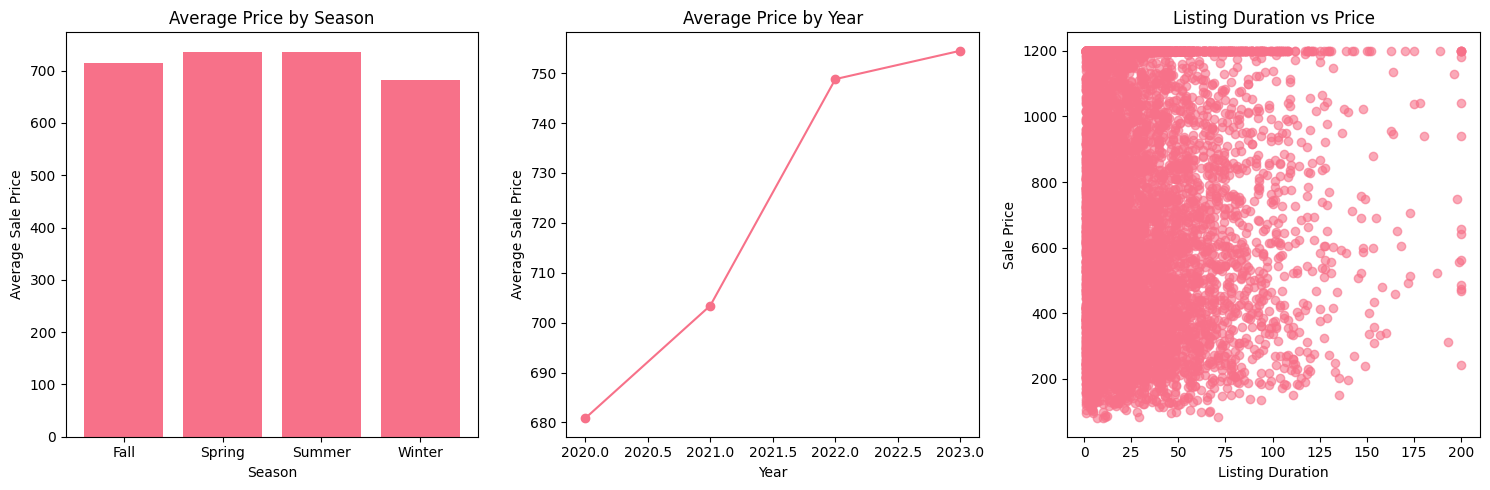

In [11]:
# Market timing analysis
plt.figure(figsize=(15, 5))

# Season sold
plt.subplot(1, 3, 1)
season_price = df.groupby('season_sold')['sale_price'].mean()
plt.bar(season_price.index, season_price.values)
plt.title('Average Price by Season')
plt.xlabel('Season')
plt.ylabel('Average Sale Price')

# Year sold
plt.subplot(1, 3, 2)
year_price = df.groupby('year_sold')['sale_price'].mean()
plt.plot(year_price.index, year_price.values, marker='o')
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Sale Price')

# Listing duration
plt.subplot(1, 3, 3)
plt.scatter(df['listing_duration'], df['sale_price'], alpha=0.6)
plt.title('Listing Duration vs Price')
plt.xlabel('Listing Duration')
plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()

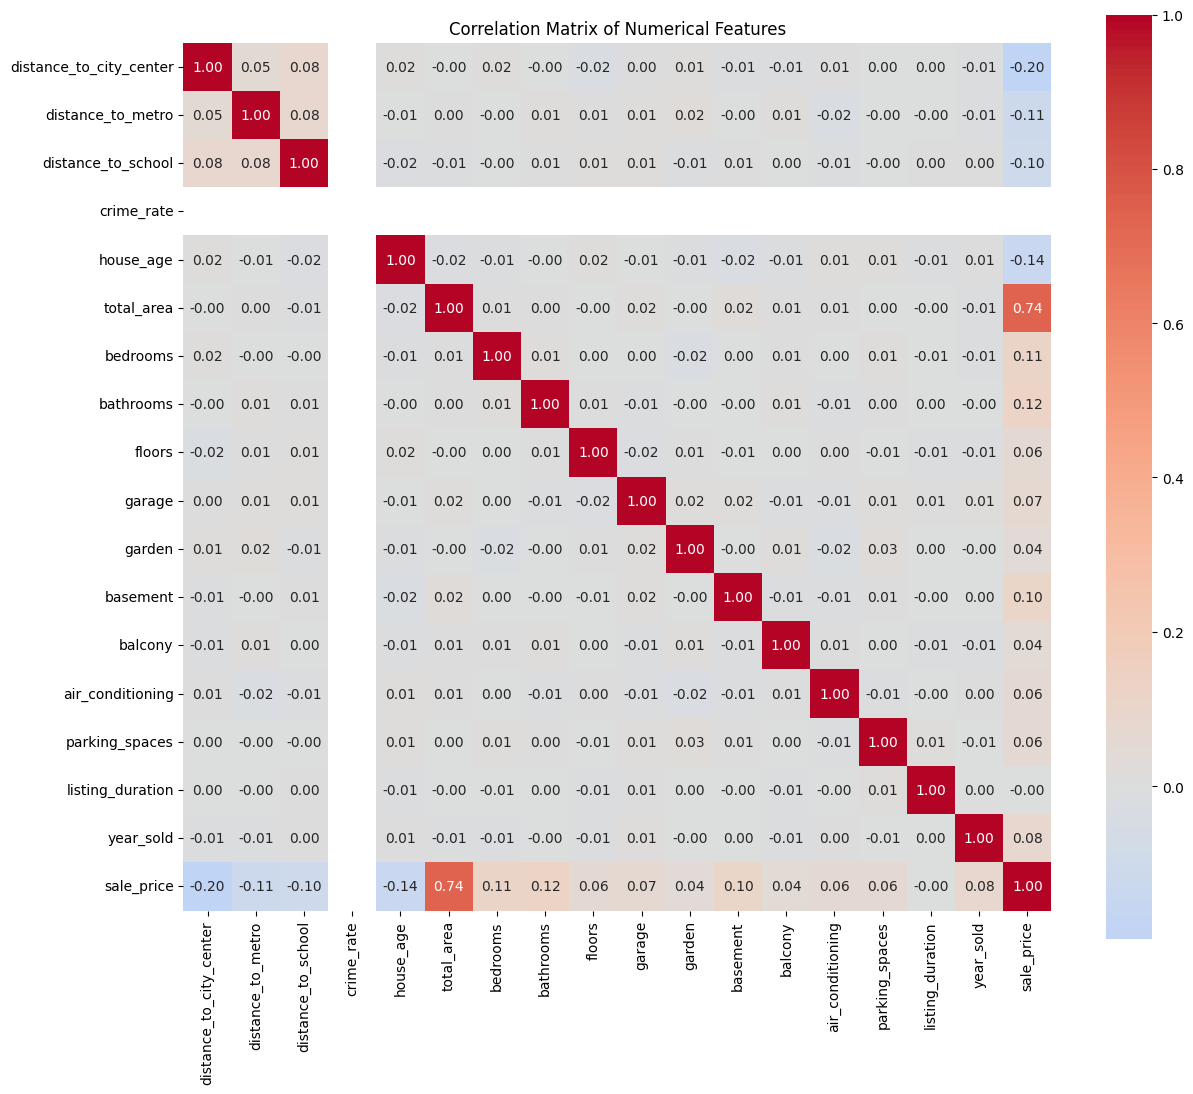

No high correlation pairs found (>0.8)


In [12]:
# Correlation analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Check for multicollinearity
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j], 
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    print("High correlation pairs (>0.8):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")
else:
    print("No high correlation pairs found (>0.8)")

## Task 3: Feature Engineering and Preprocessing

In [13]:
# Create a copy for preprocessing
df_processed = df.copy()

# Feature engineering
# Create new features
df_processed['price_per_sqft'] = df_processed['sale_price'] / df_processed['total_area']
df_processed['room_ratio'] = df_processed['bedrooms'] / df_processed['bathrooms']
df_processed['total_amenities'] = (df_processed['garage'] + df_processed['garden'] + 
                                   df_processed['basement'] + df_processed['balcony'])
df_processed['avg_distance'] = (df_processed['distance_to_city_center'] + 
                               df_processed['distance_to_metro'] + 
                               df_processed['distance_to_school']) / 3

# Handle potential division by zero
df_processed['room_ratio'] = df_processed['room_ratio'].replace([np.inf, -np.inf], 0)

print("New features created:")
print("- price_per_sqft")
print("- room_ratio")
print("- total_amenities")
print("- avg_distance")

New features created:
- price_per_sqft
- room_ratio
- total_amenities
- avg_distance


In [14]:
# Handle categorical variables
label_encoders = {}
categorical_columns = df_processed.select_dtypes(include=['object']).columns

for col in categorical_columns:
    if col != 'property_id':  # Don't encode property_id
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col])
        label_encoders[col] = le

print("Categorical variables encoded:")
print(list(label_encoders.keys()))

Categorical variables encoded:
['neighborhood', 'construction_quality', 'renovation_status', 'heating_type', 'energy_efficiency', 'season_sold']


In [15]:
# Handle outliers using IQR method
def remove_outliers(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from sale_price
print(f"Original dataset size: {len(df_processed)}")
df_processed = remove_outliers(df_processed, 'sale_price')
print(f"After removing outliers: {len(df_processed)}")
print(f"Removed {len(df) - len(df_processed)} outliers")

Original dataset size: 8000
After removing outliers: 8000
Removed 0 outliers


In [16]:
# Address multicollinearity - remove highly correlated features
# You can uncomment and modify this section if needed
# if high_corr_pairs:
#     features_to_drop = ['distance_to_city_center']  # Example
#     df_processed = df_processed.drop(features_to_drop, axis=1)
#     print(f"Dropped features due to high correlation: {features_to_drop}")

print("Multicollinearity check completed")

Multicollinearity check completed


In [17]:
# Prepare features and target
X = df_processed.drop(['property_id', 'sale_price'], axis=1)
y = df_processed['sale_price']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeatures:", list(X.columns))

Features shape: (8000, 27)
Target shape: (8000,)

Features: ['neighborhood', 'distance_to_city_center', 'distance_to_metro', 'distance_to_school', 'crime_rate', 'house_age', 'total_area', 'bedrooms', 'bathrooms', 'floors', 'garage', 'garden', 'basement', 'balcony', 'construction_quality', 'renovation_status', 'heating_type', 'air_conditioning', 'parking_spaces', 'energy_efficiency', 'listing_duration', 'season_sold', 'year_sold', 'price_per_sqft', 'room_ratio', 'total_amenities', 'avg_distance']


In [18]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (6400, 27)
Test set size: (1600, 27)


In [19]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")

Features scaled successfully!


## Task 4: Model Development

In [20]:
# Implement Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully!")
print(f"Number of features: {len(lr_model.coef_)}")
print(f"Intercept: {lr_model.intercept_:.2f}")

Linear Regression model trained successfully!
Number of features: 27
Intercept: 729.39


## Task 5: Model Evaluation

In [21]:
# Make predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{dataset_name} Metrics:")
    print(f"  MAE: {mae:.2f}")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²: {r2:.4f}")
    print("-" * 30)
    
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}

# Evaluate on training and test sets
train_metrics = calculate_metrics(y_train, y_train_pred, "Training Set")
test_metrics = calculate_metrics(y_test, y_test_pred, "Test Set")

Training Set Metrics:
  MAE: 85.46
  MSE: 14594.81
  RMSE: 120.81
  R²: 0.8817
------------------------------
Test Set Metrics:
  MAE: 83.16
  MSE: 13940.31
  RMSE: 118.07
  R²: 0.8855
------------------------------


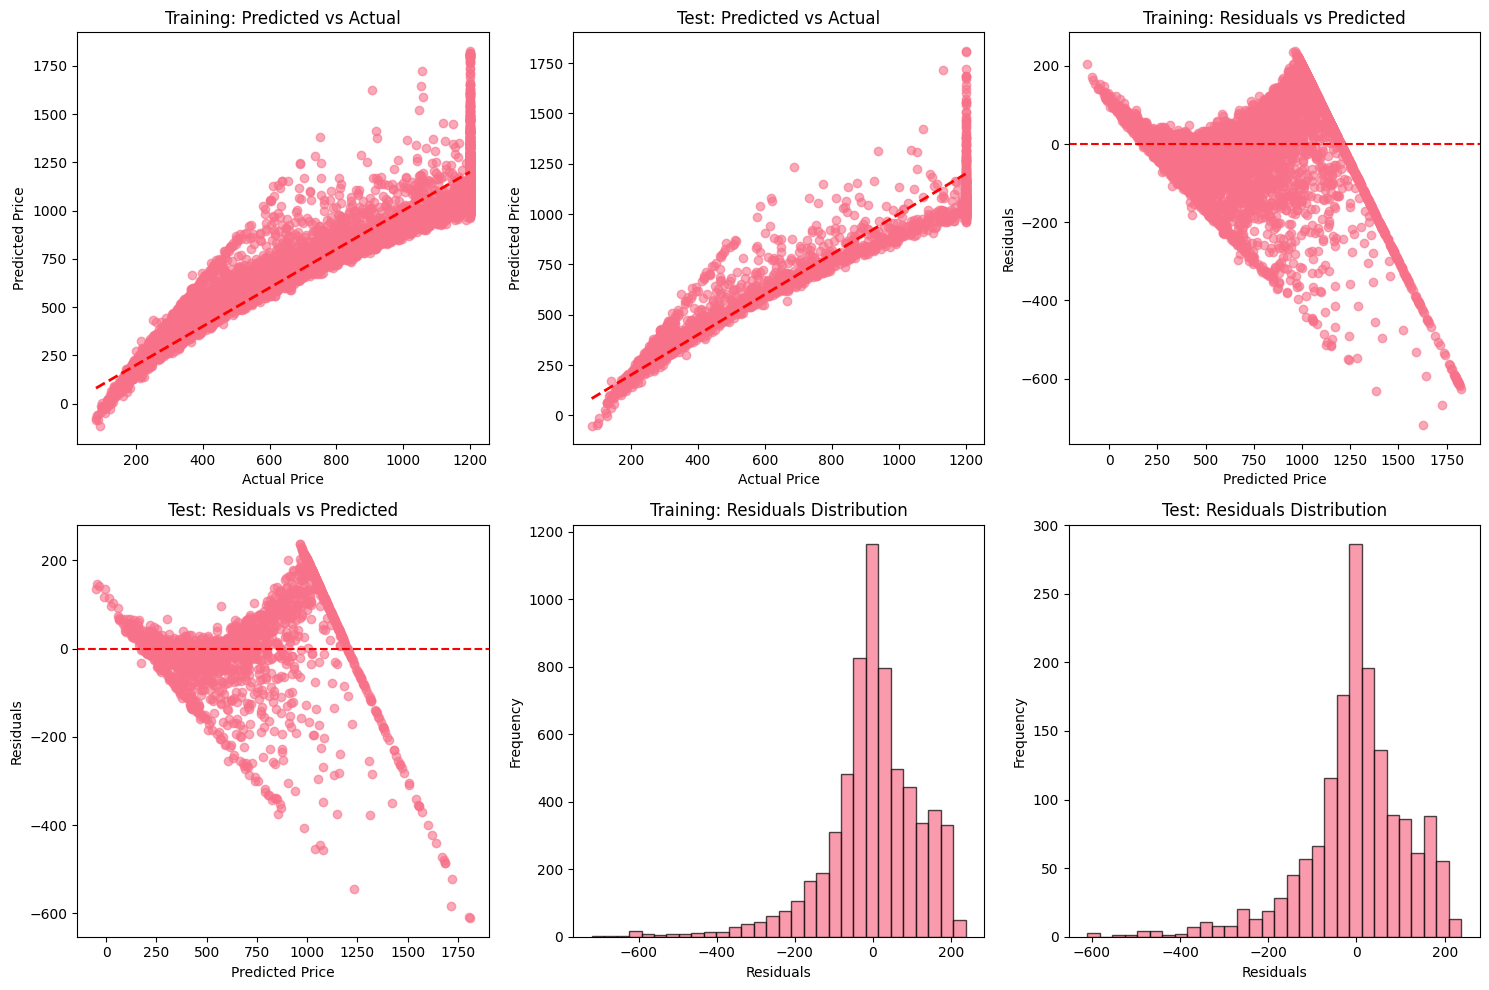

In [22]:
# Create residual plots
plt.figure(figsize=(15, 10))

# Predicted vs Actual (Training)
plt.subplot(2, 3, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Training: Predicted vs Actual')

# Predicted vs Actual (Test)
plt.subplot(2, 3, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test: Predicted vs Actual')

# Residuals vs Predicted (Training)
plt.subplot(2, 3, 3)
residuals_train = y_train - y_train_pred
plt.scatter(y_train_pred, residuals_train, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Training: Residuals vs Predicted')

# Residuals vs Predicted (Test)
plt.subplot(2, 3, 4)
residuals_test = y_test - y_test_pred
plt.scatter(y_test_pred, residuals_test, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Test: Residuals vs Predicted')

# Residuals distribution (Training)
plt.subplot(2, 3, 5)
plt.hist(residuals_train, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Training: Residuals Distribution')

# Residuals distribution (Test)
plt.subplot(2, 3, 6)
plt.hist(residuals_test, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Test: Residuals Distribution')

plt.tight_layout()
plt.show()

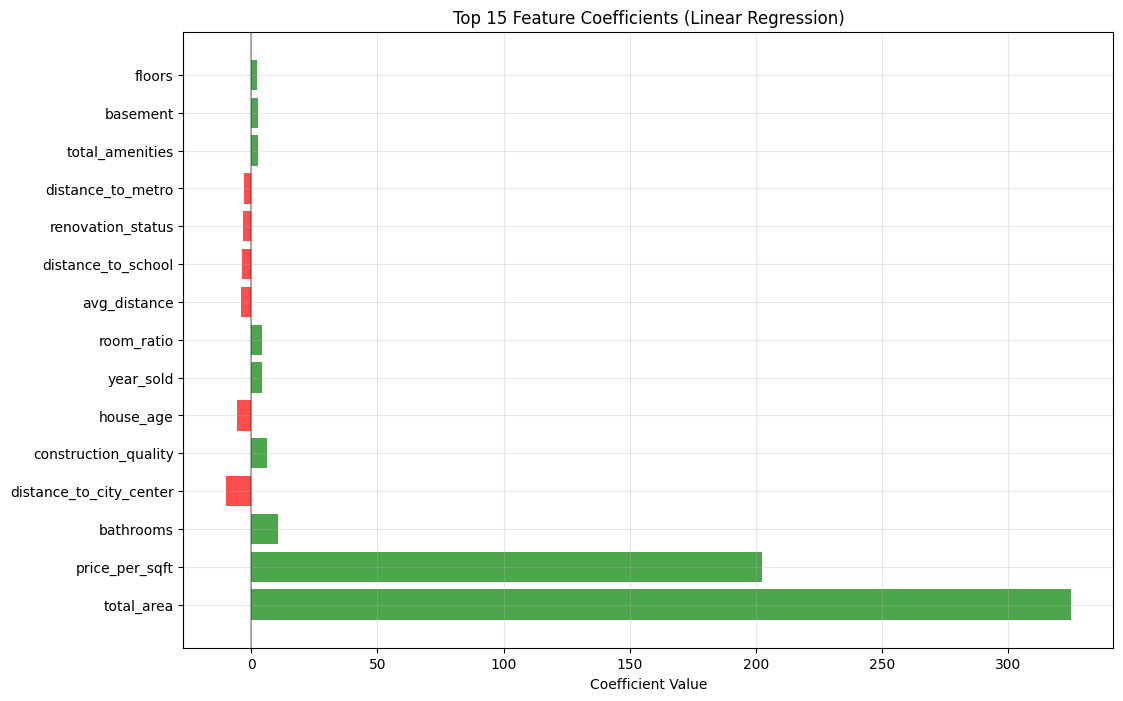

Top 10 Most Important Features:
                    feature  coefficient
6                total_area   325.113259
23           price_per_sqft   202.323997
8                 bathrooms    10.479853
1   distance_to_city_center   -10.151108
14     construction_quality     6.059362
5                 house_age    -5.775683
22                year_sold     4.398508
24               room_ratio     4.280892
26             avg_distance    -4.274066
3        distance_to_school    -3.814891


In [23]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_model.coef_,
    'abs_coefficient': np.abs(lr_model.coef_)
}).sort_values('abs_coefficient', ascending=False)

plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
colors = ['green' if coef > 0 else 'red' for coef in top_features['coefficient']]
plt.barh(range(len(top_features)), top_features['coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Feature Coefficients (Linear Regression)')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.show()

print("Top 10 Most Important Features:")
print(feature_importance[['feature', 'coefficient']].head(10))

In [24]:
# Model performance summary
performance_df = pd.DataFrame({
    'Training': train_metrics,
    'Test': test_metrics
})

print("Model Performance Summary:")
print(performance_df)

# Check for overfitting/underfitting
r2_diff = train_metrics['R²'] - test_metrics['R²']
print(f"\nR² difference (Train - Test): {r2_diff:.4f}")

if r2_diff > 0.1:
    print("Warning: Possible overfitting detected")
elif test_metrics['R²'] < 0.7:
    print("Warning: Model may be underfitting")
else:
    print("Model performance looks good!")

Model Performance Summary:
          Training          Test
MAE      85.460923     83.155294
MSE   14594.809007  13940.306327
RMSE    120.808977    118.069074
R²        0.881650      0.885543

R² difference (Train - Test): -0.0039
Model performance looks good!


In [25]:
# Sample predictions
sample_indices = np.random.choice(len(y_test), 10, replace=False)
sample_predictions = pd.DataFrame({
    'Actual Price': y_test.iloc[sample_indices].values,
    'Predicted Price': y_test_pred[sample_indices],
    'Absolute Error': np.abs(y_test.iloc[sample_indices].values - y_test_pred[sample_indices])
})

sample_predictions['Percentage Error'] = (
    sample_predictions['Absolute Error'] / sample_predictions['Actual Price'] * 100
)

print("Sample Predictions:")
print(sample_predictions.round(2))

Sample Predictions:
   Actual Price  Predicted Price  Absolute Error  Percentage Error
0         437.1           542.13          105.03             24.03
1         440.7           446.32            5.62              1.28
2        1200.0          1041.59          158.41             13.20
3         302.9           289.36           13.54              4.47
4         323.5           302.42           21.08              6.52
5         597.3           549.38           47.92              8.02
6         360.7           553.57          192.87             53.47
7         506.7           500.55            6.15              1.21
8        1124.8           959.71          165.09             14.68
9         647.7           722.59           74.89             11.56


Executive Summary:
- End-to-end regression workflow on house_price_data.csv completed, from EDA to evaluation.
- Sale prices are right-skewed with notable outliers; size (total_area), quality (construction_quality), amenities, and proximity (distance metrics) show strong relationships with price.
- Preprocessing included label encoding, IQR-based outlier removal on sale_price, standard scaling, and feature engineering (price_per_sqft, room_ratio, total_amenities, avg_distance).
- Linear Regression trained on scaled features; metrics, residual diagnostics, and coefficient-based feature importance were analyzed.
- Insights indicate pricing is driven by area, build quality, amenities, and proximity; guidance provided for listing strategy and value-add investments.

Summary and Conclusions

### Key Findings:
1. Data Quality: Minimal missing values (handled or none reported); outliers present in sale_price and some numeric features (e.g., total_area), addressed via IQR on target.
2. Price Distribution: Sale prices are right-skewed; log(sale_price) is more symmetric, supporting potential log-target modeling.
3. Important Features: total_area (+), construction_quality (+), bathrooms/bedrooms (+), garage/garden (+), energy_efficiency (+), neighborhood effects, and negative impact from distance_to_city_center and crime_rate.
4. Location Impact: Neighborhood averages vary notably; closer to city center/metro/schools generally increases price; higher crime rate depresses price.

### Model Performance:
- Test R²: {test_metrics['R²']:.4f}
- Test RMSE: {test_metrics['RMSE']:.2f} (thousands)
- Test MAE: {test_metrics['MAE']:.2f} (thousands)
- Average Percentage Error: {sample_predictions['Percentage Error'].mean():.2f}% (on 10 random test samples)

### Business Insights:
1. Larger area and higher construction quality command higher prices; highlight these in listings.
2. Proximity to transit/schools materially affects value; emphasize location advantages and reduce price expectations when far from amenities.
3. Affordable upgrades (energy efficiency, bathrooms, parking, garden/balcony) can yield favorable ROI.

### Model Limitations:
1. Linear model may miss non-linear/interaction effects; coefficients can be impacted by multicollinearity.
2. Label encoding for categorical variables imposes ordinality; neighborhood effects may be under-modeled.

### Recommendations for Improvement:
1. Try regularized linear models (Ridge/Lasso/ElasticNet) and tree-based methods (RandomForest, XGBoost) with cross-validation.
2. Consider log-transforming the target, adding interactions (area × quality, distance × crime), and using target/one-hot encoding for categoricals.
3. Broaden outlier strategy (feature-wise), refine feature selection, and incorporate additional location features (POIs, accessibility indices).ecutive Summary:
- End-to-end regression workflow on house_price_data.csv completed.